# Linear models - Losses

In this notebook, we will have a deeper look to linear models and especially the concept of loss functions. We will reuse the previous regression problem where we wanted to model the relationship between  the penguins' flipper length and their body mass.

In [1]:
import pandas as pd

data = pd.read_csv("../datasets/penguins_regression.csv")
data.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [2]:
import seaborn as sns
sns.set_context("poster")

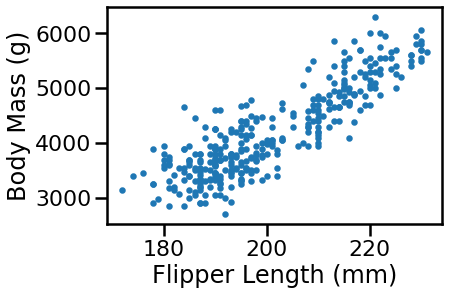

In [3]:
_ = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")

We observe that there is a reasonable linear relationship between the flipper length and the body mass. Here, our target to be predicted will be the body mass while the flipper length will be a feature.

In [4]:
X, y = data[["Flipper Length (mm)"]], data["Body Mass (g)"]

In the previous notebook, we used a <tt>LinearRegression</tt> from scikit-learn and show that we could learn the state of the model from the data when calling <tt>fit</tt> and use these states for prediction when calling the method <tt>predict</tt>.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

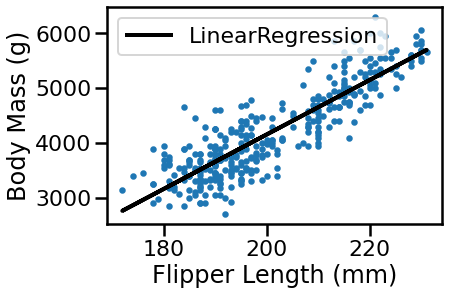

In [6]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In the previous notebook, we quickly mentioned that the linear regression model was minizing an error between the true target and the predicted target. This error is also known as loss function. The loss that is minimized in this case is known as the least squared error. This loss is defined as:

$$
loss = (y - \hat{y})^2
$$

that is

$$
loss = (y - X \beta)^2
$$

We can check what the loss look likes in practice:

In [7]:
def se_loss(y_true, y_pred):
    loss = (y_true - y_pred) ** 2
    return loss

In [8]:
import numpy as np

xmin, xmax = -2, 2
xx = np.linspace(xmin, xmax, 100)

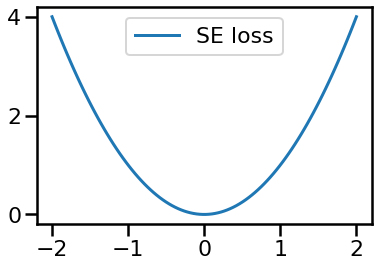

In [9]:
import matplotlib.pyplot as plt

plt.plot(xx, se_loss(0, xx), label="SE loss")
_ = plt.legend()

Looking at the shape of the loss function, we see that the bell shape of the loss will impact greatly the large error.
In practice, this will have an impact on the fit.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Create a new sample in the dataset that we will call an outlier. This penguin will have a flipper length of 230 mm and a body mass of 300 g.</li>
        <li>Plot the new dataset.</li>
        <li>Fit a <tt>LinearRegression</tt> model on this new dataset. When calling <tt>fit</tt> pass a <tt>sample_weight</tt> provide 10x more weight to the last sample (outlier) than on other samples.</li>
        <li>Plot the predictions given by this model.</li>
    </ul>
    What is the effect of having an outlier in the dataset?
</div>

In [10]:
data = data.append({"Flipper Length (mm)": 230, "Body Mass (g)": 300}, ignore_index=True)

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

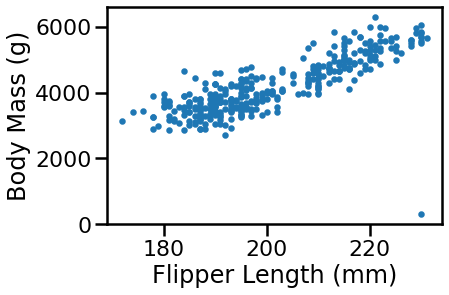

In [11]:
data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")

In [12]:
sample_weight = np.ones(len(data))

In [13]:
sample_weight[-1] = 10 
sample_weight

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [14]:
data["Body Mass (g)"]

0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
338    3400.0
339    3775.0
340    4100.0
341    3775.0
342     300.0
Name: Body Mass (g), Length: 343, dtype: float64

In [15]:
X, y = data[["Flipper Length (mm)"]], data["Body Mass (g)"]

In [16]:
model = LinearRegression()
model.fit(X, y, sample_weight = sample_weight)
y_pred = model.predict(X)

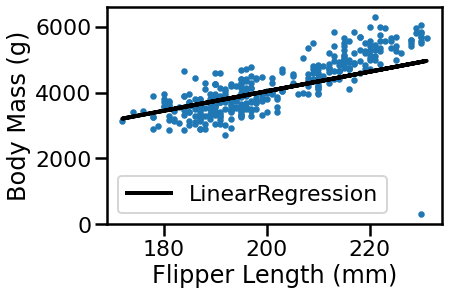

In [17]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In [18]:
# %load solutions/solution_01.py

In [19]:
# %load solutions/solution_02.py

In [20]:
# %load solutions/solution_03.py

In [21]:
# %load solutions/solution_04.py

In [22]:
# %load solutions/solution_05.py

In [23]:
# %load solutions/solution_06.py

Instead of using the squared loss, we will use a loss known as the Huber loss. In this regard, we will use the `HuberRegressor` model available in scikit-learn. We will fit this model in the exact similar way that we previously did.

In [24]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

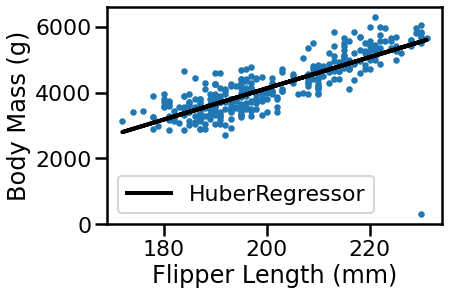

In [25]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

We observe that the outlier has much less weight than in the case of the least squared loss.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Look at the documentation of the <tt>HuberRegressor</tt>.</li>
        <li>Similarly to the loss function <tt>se_loss</tt>, define a function <tt>huber_loss</tt> to depict the shape of the loss.</li>
        <li>Reproduce the same for the absolute loss.</li>
    </ul>
    Why outliers have less impact on the fit of an Huber regressor than an ordinary least square.
</div>

In [26]:
def absolute_loss(y_true, y_pred):
    absolute_loss = np.absolute(y_true - y_pred)
    return absolute_loss

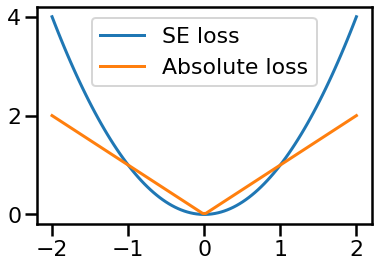

In [27]:
plt.plot(xx, se_loss(0, xx), label="SE loss")
plt.plot(xx, absolute_loss(0, xx), label="Absolute loss")
_ = plt.legend()

In [28]:
def huber_loss(y_true, y_pred, epsilon=1.35):
    mask_greater_epsilon = np.abs(y_true - y_pred) > epsilon
    loss = np.zeros_like(y_pred)
    loss[mask_greater_epsilon] = np.abs(y_true - y_pred)[mask_greater_epsilon]
    loss[~mask_greater_epsilon] = se_loss(y_true, y_pred)[~mask_greater_epsilon]
    return loss

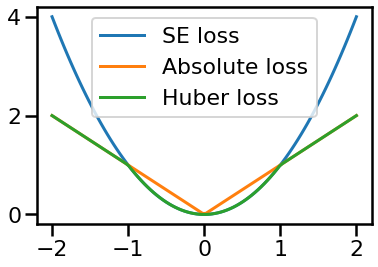

In [29]:
plt.plot(xx, se_loss(0, xx), label="SE loss")
plt.plot(xx, absolute_loss(0, xx), label="Absolute loss")
plt.plot(xx, huber_loss(0, xx, 1), label="Huber loss")
_ = plt.legend()

In [30]:
# %load solutions/solution_07.py

In [31]:
# %load solutions/solution_08.py

In [32]:
# %load solutions/solution_09.py

We observe that the Huber and absolute losses are penalizing less outliers. It means that these outliers will be less attractive and we will not try to find $\beta$ that try to minimize this large error. Indeed, the <tt>HuberRegressor</tt> will give an estimator of the median instead of the mean.

If one is interesting in other quantile than the median, scikit-learn provides an estimator called `QuantileRegressor` that minimizes the pinball loss and provide a estimator of the requested quantile. For instance, one could request the median in the following manner:

In [33]:
from sklearn.linear_model import QuantileRegressor

model = QuantileRegressor(quantile=0.5)
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

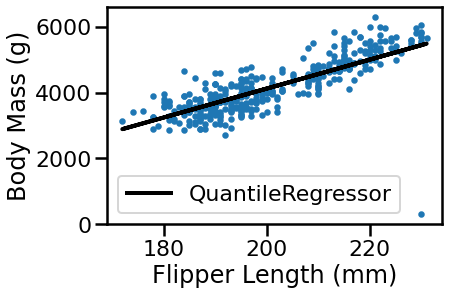

In [34]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

The advantage of this estimator is that one can estimate some confidence interval.

In [35]:
model = QuantileRegressor(quantile=0.5, solver="highs")
model.fit(X, y, sample_weight=sample_weight)
y_pred_median = model.predict(X)

model.set_params(quantile=0.90)
model.fit(X, y, sample_weight=sample_weight)
y_pred_90 = model.predict(X)

model.set_params(quantile=0.10)
model.fit(X, y, sample_weight=sample_weight)
y_pred_10 = model.predict(X)

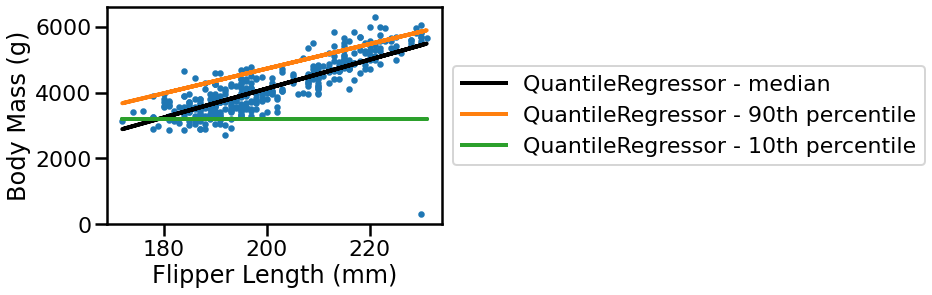

In [36]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred_median, label=f"{model.__class__.__name__} - median", color="black", linewidth=4)
ax.plot(X, y_pred_90, label=f"{model.__class__.__name__} - 90th percentile", color="tab:orange", linewidth=4)
ax.plot(X, y_pred_10, label=f"{model.__class__.__name__} - 10th percentile", color="tab:green", linewidth=4)
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Here, we provide a 80% confidence interval around the median by fitting the 10th and 90th percentiles of the dataset.